# Loading Classification Model:

In [ ]:
!pip install transformers
from transformers import AutoModel, AutoTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.3 MB/s eta 0:00:00


In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/araBERTv2/bert-base-arabertv2")
arabert_model = AutoModel.from_pretrained("/content/drive/MyDrive/araBERTv2/bert-base-arabertv2")

Some weights of the model checkpoint at /content/drive/MyDrive/araBERTv2/bert-base-arabertv2 were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.model = arabert_model
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 9)
    
    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.model(
            input_ids, 
            attention_mask=attn_mask, 
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output)
        output = self.linear(output_dropout)
        return output

In [ ]:
target_list =['Agricultural_Economics',	'Agriculture_Biotechnology',	'Crop_production',	
              'Environmental_Sciences',	'Food_Technology',	'Horticulture',	'Livestock_production',
              'Natural_Resources',	'Plant_Protection']

In [ ]:
device = torch.device('cpu')
bert_model = BERTClass()
bert_model.load_state_dict(torch.load('/content/drive/MyDrive/araBERTv2/arabert_classifier.pt', map_location=device))
bert_model.eval()

In [ ]:
def arabert_predict(sample):
  encodings = tokenizer.encode_plus(
    sample,
    None,
    add_special_tokens=True,
    max_length= 256,
    padding='max_length',
    return_token_type_ids=True,
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
  )
  bert_model.eval()
  with torch.no_grad():
    input_ids = encodings['input_ids'].to(device, dtype=torch.long)
    attention_mask = encodings['attention_mask'].to(device, dtype=torch.long)
    token_type_ids = encodings['token_type_ids'].to(device, dtype=torch.long)
    output = bert_model(input_ids, attention_mask, token_type_ids)
    final_output = torch.sigmoid(output).cpu().detach().numpy().tolist()
    # print(train_dataset.columns[1:].to_list()[(np.argmax(final_output, axis=1)).astype(int)])
    predictions = []
    for idx, label in enumerate(target_list):
      if (final_output[0][idx] > 0.4):
        predictions.append((label,round(final_output[0][idx]*100, 2)))  # round(preds[idx]*100, 2
    return (predictions)

In [ ]:
device

device(type='cpu')

# Reviewers Dataset Preprocessing

In [ ]:
import pandas as pd

In [ ]:
reviewers = pd.read_csv('/content/reviewers2.csv')
reviewers.head()

In [ ]:
reviewers.head()

In [ ]:
!pip install camel_tools
from camel_tools.utils.dediac import dediac_ar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 5.0 MB/s 
     |████████████████████████████████| 418 kB 36.3 MB/s 
     |████████████████████████████████| 216 kB 30.1 MB/s 
  Created wheel for camel-kenlm: filename=camel_kenlm-2021.12.27-cp37-cp37m-linux_x86_64.whl size=2336131 sha256=f395eb43ee1201528653120d83e963e7b14d49bc7130b5735dbf2a29dec10caf
  Stored in directory: /root/.cache/pip/wheels/db/72/74/982f8c435f15b7feaf6dc8a03e212ff34e93f1f2d747059332
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=b88845413367756e023d2b4b67b0450c4f861a2d3098c951a5760344fcb97649
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=d2fe61a16dd59480d4de4a2ad53b2d8c321285a6d26a62efa86b13a2ad853d0c
  Stored in directory: /root/.cac

In [ ]:
for i,x in enumerate(reviewers.Publications):
  reviewers.Publications[i]= str(reviewers.General_specification[i]) +' '+ str(reviewers.Specification[i]) +' ' + str(reviewers.Publications[i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
reviewers['clean_txt'] = reviewers['Publications'].map(dediac_ar)

In [ ]:
import re
import string
def remove_numbers_punctuations (text):
    clean_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ', str(text))
    clean_text = re.sub(r'\w*\d\w*', ' ', str(clean_text))
    clean_text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', clean_text)
    clean_text = re.sub(r'،|؛', ' ', str(clean_text))
    clean_text = re.sub(r'\n', ' ', str(clean_text))
    return clean_text

In [ ]:
def only_ar_text(text):
    ar_text = re.findall('[\u0600-\u06ff]+', str(text))
    ar_text = " ".join(ar_text)
#     ar_text = re.sub(r"[A-Z]['\w]*|[a-z]['\w]*", ' ', str(text))
    return ar_text

In [ ]:
def remove_extra_spaces(text):
    no_space = re.sub(r"\s+", " ", str(text))
    return no_space

In [ ]:
reviewers['clean_txt'] = reviewers['clean_txt'].map(remove_numbers_punctuations)

In [ ]:
reviewers['clean_txt'] = reviewers['clean_txt'].map(only_ar_text)

In [ ]:
reviewers['clean_txt'] = reviewers['clean_txt'].map(remove_extra_spaces)

In [ ]:
reviewers.head()

In [ ]:
max(len(reviewers['clean_txt'][i].split()) for i in range(len(reviewers.ID)))

21346

In [ ]:
def get_abstract(reviewers):
  parts =  reviewers.split('مقدمة',1)
  if(len(parts[0].split())>200):
    abstract = parts[0][:1300]
  else:
    abstract = parts[0]
  return (abstract)

In [ ]:
reviewers['abstract'] = reviewers['clean_txt'].map(get_abstract)


In [ ]:
max(len(reviewers['abstract'][i].split()) for i in range(len(reviewers.ID)))

305

In [ ]:
reviewers.head()

In [ ]:
reviewers['Agricultural_Economics'] = 0
reviewers['Agriculture_Biotechnology'] = 0
reviewers['Crop_production'] = 0
reviewers['Environmental_Sciences'] = 0
reviewers['Food_Technology'] = 0
reviewers['Horticulture'] = 0
reviewers['Livestock_production'] = 0
reviewers['Natural_Resources'] = 0
reviewers['Plant_Protection'] = 0 

In [ ]:
reviewers.head()

In [ ]:
reviewers.iloc[202]

In [ ]:
dd = arabert_predict(reviewers.abstract[202])
dd

[('Crop_production', 98.92), ('Natural_Resources', 68.18)]

In [ ]:
for idx,x in enumerate(reviewers.ID):
  pred = arabert_predict(reviewers.abstract[idx])
  for i,pre in enumerate(pred):
    if pred[i][0] in reviewers.columns:
      reviewers[pred[i][0]][idx] =1

In [ ]:
reviewers.head(20)

In [ ]:
reviewers.to_csv('/content/reviewers3.csv', header=True)

# Text Embedding (Reviewers & Articles Datasets)

In [ ]:
reviewers = pd.read_csv('/content/drive/MyDrive/reviewers3.csv')
reviewers.head()

In [ ]:
reviewers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 203 non-null    int64 
 1   ID                         203 non-null    int64 
 2   Name                       203 non-null    object
 3   Workplace                  203 non-null    object
 4   General_specification      203 non-null    object
 5   Specification              192 non-null    object
 6   Phone                      195 non-null    object
 7   Email                      197 non-null    object
 8   Email2                     24 non-null     object
 9   abstract                   203 non-null    object
 10  Agricultural_Economics     203 non-null    int64 
 11  Agriculture_Biotechnology  203 non-null    int64 
 12  Crop_production            203 non-null    int64 
 13  Environmental_Sciences     203 non-null    int64 
 14  Food_Techn

In [3]:
articles = pd.read_csv('/content/drive/MyDrive/articles9_9_22.csv')
articles.drop(columns=['Unnamed: 0'], inplace=True)

articles['all_Authors'] = None
for i,x in enumerate(articles.co_Author):
  articles.all_Authors[i]= str(articles.Author[i]) +', '+ str(articles.co_Author[i])
articles.info()

<ipython-input-3-d7b3f0cab868>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles.all_Authors[i]= str(articles.Author[i]) +', '+ str(articles.co_Author[i])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Article_ID                 998 non-null    int64  
 1   folder                     998 non-null    object 
 2   ar_en                      998 non-null    object 
 3   Country                    998 non-null    object 
 4   Title                      998 non-null    object 
 5   Author                     998 non-null    object 
 6   Author_certificate         998 non-null    object 
 7   Author_specification       998 non-null    object 
 8   work                       991 non-null    object 
 9   co_Author                  825 non-null    object 
 10  Email                      891 non-null    object 
 11  contact                    893 non-null    object 
 12  Scope                      998 non-null    object 
 13  Scope_specific             821 non-null    object 

In [ ]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer, util

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.8 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=62e10b2ae474cf5574387eb99d4bc2d57711472c816dbdcc905d36546097461c
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
# embedder = SentenceTransformer('all-MiniLM-L6-v2')
# embedder = SentenceTransformer('distiluse-base-multilingual-cased')
embedder = SentenceTransformer('/content/drive/MyDrive/araBERTv2/bert-base-arabertv2')

Some weights of the model checkpoint at /content/drive/MyDrive/araBERTv2/bert-base-arabertv2 were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# corpus_embeddings_rev = embedder.encode(reviewers.abstract, convert_to_tensor=True, show_progress_bar=True)

# Paper/Reviewer Recommender System:
## input:
1. Title + abstract
2. Authors list

## Process:
1. Topic prediction (arabert multi-label classification model)
2. Reviewers recommender system:
  - reviewers corpus: which have similar classification results, but no common authors exist
  - papers corpus: which have similar classification results, but no common authors exist
  - sentence embedding: for both corpora
  - Cosine similarity: between sample (title + abstract) and embedded text

## Output:
1. Top 10 Recommended Reviewers from main corpus (reviewers dataset)
2. Top 10 Recommended Reviewers from additional corpus (articles dataset)

In [ ]:
class Reviewer_Recommender:

  def __init__(self, sample, predicted_topic, embedder, topN):
    self.sample = sample
    self.predicted_topic = predicted_topic
    self.embedder = embedder
    self.topN = topN

  # Reviewers subset
  def main_corpus(self):

    subset = reviewers
    # select papers with similar topics only
    for i,topic in enumerate(predicted_topic):
      subset = subset[subset[predicted_topic[i][0]] ==1]
    subset.reset_index(inplace=True, drop= True)
    # drop articles of specified reviewer
    for idx, rev in enumerate(subset.Name):
      if (rev in self.sample.all_Authors):
        subset.drop(index= idx, axis=0, inplace= True)
    subset.reset_index(inplace=True, drop= True)
    return subset
  
  # articles subset
  def additional_corpus(self):

    subset2 = articles
    # select papers with similar topics only
    for i,topic in enumerate(predicted_topic):
      subset2 = subset2[subset2[predicted_topic[i][0]] ==1]
    subset2.reset_index(inplace=True, drop=True)

    # exclude papers with at least one common author
    for idx, rev in enumerate(subset2.all_Authors):
      rev = rev.split(',')
      for name in rev:
        if (name in self.sample.all_Authors):
          subset2.drop(index= idx, axis=0, inplace= True)
          break
    subset2.reset_index(inplace=True, drop=True)

    # select only PhD Authors
    for j,cert in enumerate(subset2.Author_certificate):
      if (cert not in 'الدكتور, الدكتورة'):
        subset2.drop(index= j, axis=0, inplace= True)
    subset2.reset_index(inplace=True, drop=True)
    return subset2

  # reviewers & articles corpora embedding:
  def subset_embedding(self, subset):
    return self.embedder.encode(subset.abstract, convert_to_tensor=True, show_progress_bar=True)
  
  def similar_papers_rev(self):
    main_courpus = self.main_corpus()
    if main_courpus.empty:
      return []
    else:
      query_embedding = self.embedder.encode(self.sample.abstract, convert_to_tensor=True)
      results = []
      ids = []
      subset_emb_rev = self.subset_embedding(self.main_corpus())
      for idx,emb in enumerate(subset_emb_rev):
        res = util.cos_sim(query_embedding, emb).item()
        results.append(res)
        ids.append(idx)
      top_simi = sorted(zip(results, ids), reverse=True)
      print("Query: ",self.sample.Article_ID, self.sample.abstract)
      print("Most similar papers:\nScore:")

      output = []
      topn = min(len(subset_emb_rev), self.topN)
      for i in range(topn):
        related_paper = main_courpus.iloc[top_simi[i][1]]
        output.append(related_paper)
        print("{:.2f}\t Name: {};\n\t General_specification: {};\n\t specification :{} ;\n\t Abstract: {}\n".format(top_simi[i][0],related_paper['Name'], related_paper['General_specification'], related_paper['Specification'],related_paper['abstract']))
      return output

  def similar_papers_artic(self):
    query_embedding = self.embedder.encode(self.sample.abstract, convert_to_tensor=True)
    results = []
    ids = []
    subset_emb = self.subset_embedding(self.additional_corpus())
    for idx,emb in enumerate(subset_emb):
      res = util.cos_sim(query_embedding, emb).item()
      results.append(res)
      ids.append(idx)
    top_simi = sorted(zip(results, ids), reverse=True)
    print("Query: ",self.sample.Article_ID ,self.sample.abstract)
    print("Most similar papers:\nScore:")
    
    additional_output = []
    topn = min(len(subset_emb), self.topN)
    for i in range(topn):
      related_paper = self.additional_corpus().iloc[top_simi[i][1]]
      additional_output.append(related_paper)
      print("{:.2f}\t Author: {};\n\t Author_specification: {};\n\t co_Author:{} ;\n\t Abstract: {}\n".format(top_simi[i][0],related_paper['Author'], related_paper['Author_specification'], related_paper['co_Author'],related_paper['abstract']))
    return additional_output

  def recommended_reviewers(self):
    # similar_papers_rev = self.similar_papers_rev()
    # if len(similar_papers_rev) <1:
    #   return []
    # else:
      rev_names = []
      for i,name in enumerate(self.similar_papers_rev()):
        rev_names.append(name.Name)
      return rev_names

  def additional_recommended_reviewers(self):
    add_rev_names = []
    for i,name in enumerate(self.similar_papers_artic()):
      add_rev_names.append(name.Author)
    return add_rev_names


In [ ]:
sample = articles.loc[16]
sample

In [ ]:
predicted_topic = arabert_predict(sample.abstract)
predicted_topic

[('Agriculture_Biotechnology', 98.33), ('Natural_Resources', 98.05)]

In [ ]:
out = Reviewer_Recommender(sample, predicted_topic, embedder, 10)
rev_names = out.recommended_reviewers()
print(rev_names)

main_courpus.empty
main_courpus.empty
[]


In [ ]:
actual_reviewers = [sample.Reviewer1, sample.Reviewer2, sample.Reviewer3]
actual_reviewers = [x for x in actual_reviewers if str(x) != 'nan']
actual_reviewers

In [ ]:
add_rev_names = out.additional_recommended_reviewers()
print(add_rev_names)

In [ ]:
sample3 = articles.iloc[975]
sample3

In [ ]:
predicted_topic = arabert_predict(sample3.abstract)
predicted_topic

[('Agriculture_Biotechnology', 99.48), ('Livestock_production', 99.1)]

In [ ]:
out3 = Reviewer_Recommender(sample3, predicted_topic, embedder, 10)
rev_names = out3.recommended_reviewers()
print(rev_names)

In [ ]:
actual_reviewers = [sample3.Reviewer1, sample3.Reviewer2, sample3.Reviewer3]
actual_reviewers = [x for x in actual_reviewers if str(x) != 'nan']
actual_reviewers

In [ ]:
add_rev_names = out3.additional_recommended_reviewers()
print(add_rev_names)

In [ ]:
sample = articles.iloc[990]
sample

In [ ]:
predicted_topic = arabert_predict(sample.abstract)
predicted_topic

[('Horticulture', 99.46)]

In [ ]:
out = Reviewer_Recommender(sample, predicted_topic, embedder, 10)
rev_names = out.recommended_reviewers()
print(rev_names)

In [ ]:
actual_reviewers = [sample.Reviewer1, sample.Reviewer2, sample.Reviewer3]
actual_reviewers = [x for x in actual_reviewers if str(x) != 'nan']
actual_reviewers

In [ ]:
add_rev_names = out.additional_recommended_reviewers()
print(add_rev_names)

# Evaluating Recommender System

In [ ]:
def precision_recall_at_k(actual, predicted, k):
  # score = 0
  num_hits = 0
  idx = []

  rng = min(k,len(predicted))
  for x ,p in enumerate(predicted[:rng]):
    if p in actual:  # and p not in predicted[:i]
      num_hits += 1
      # score += num_hits / (x+1)
      idx.append(x+1)
  pak = num_hits / k
  if (len(actual) ==0): recallk=0
  else: recallk = num_hits/ len(actual)
  return (pak, recallk, num_hits, idx)

def mean_average_precision_at_k(actual, predicted, k):
  return np.mean([precision_recall_at_k(a,p,k)[0] for a,p in zip(actual, predicted)])

In [ ]:
pak, recall, hits, ids = precision_recall_at_k(actual_reviewers,rev_names,3 )
print('precision@3: {}\t recall@3: {}\t num_hits: {}\t i: {}'.format(pak, recall, hits, ids))
pak, recall, hits, ids = precision_recall_at_k(actual_reviewers,rev_names,8 )
print('precision@8: {}\t recall@8: {}\t num_hits: {}\t i: {}'.format(pak, recall, hits, ids))
pak, recall, hits, ids = precision_recall_at_k(actual_reviewers,rev_names,10 )
print('precision@10: {}\t recall@10: {}\t num_hits: {}\t i: {}'.format(pak, recall, hits, ids))

precision@3: 0.0	 recall@3: 0	 num_hits: 0	 i: []
precision@8: 0.0	 recall@8: 0	 num_hits: 0	 i: []
precision@10: 0.0	 recall@10: 0	 num_hits: 0	 i: []


In [ ]:
percision_at3 = []
recall_at3 = []
percision_at5 = []
recall_at5 = []
percision_at10 = []
recall_at10 = []

all_hits = []
ranks_idx = []


for idx in range(997):
  sample = articles.iloc[idx]
  predicted_topic = arabert_predict(sample.abstract)
  out = Reviewer_Recommender(sample, predicted_topic, embedder, 10)
  predicted_reviewers = out.recommended_reviewers()
  actual_reviewers = [articles.Reviewer1[idx], articles.Reviewer2[idx], articles.Reviewer3[idx]]
  actual_reviewers = [x for x in actual_reviewers if str(x) != 'nan']
  print('\n actual_reviewers', actual_reviewers)
  print('predicted_reviewers \n', predicted_reviewers)

  pak, recall, hits, ids = precision_recall_at_k(actual_reviewers,predicted_reviewers,3)
  print('precision@3: {}\t recall@3: {}\t num_hits: {}\t i: {}'.format(pak, recall, hits, ids))
  percision_at3.append(pak)
  recall_at3.append(recall)
  pak, recall, hits, ids = precision_recall_at_k(actual_reviewers,predicted_reviewers,5 )
  print('precision@5: {}\t recall@5: {}\t num_hits: {}\t i: {}'.format(pak, recall, hits, ids))
  percision_at5.append(pak)
  recall_at5.append(recall)
  pak, recall, hits, ids = precision_recall_at_k(actual_reviewers,predicted_reviewers,10 )
  print('precision@10: {}\t recall@10: {}\t num_hits: {}\t i: {}'.format(pak, recall, hits, ids))
  percision_at10.append(pak)
  recall_at10.append(recall)

  all_hits.append(hits)
  ranks_idx.extend(ids)
  # print('score: {}\t num_hits: {}\t ranks_idx: {}'.format(score, num_hits, idx))


In [4]:
actual_reviewers = []
for idx in range(997):
  actual_reviewers.append(articles.Reviewer1[idx])
  actual_reviewers.append(articles.Reviewer2[idx])
  actual_reviewers.append(articles.Reviewer3[idx])

In [9]:
actual_reviewers = [x for x in actual_reviewers if str(x) != 'nan']

In [49]:
len_real_rev = []
rev = []
for idx in range(997):
  actual_reviewers = [articles.Reviewer1[idx], articles.Reviewer2[idx], articles.Reviewer3[idx]]
  actual_reviewers = [x for x in actual_reviewers if str(x) != 'nan']
  rev.append(actual_reviewers)
  len_real_rev.append(len(actual_reviewers))

In [52]:
real_recall3 = []
for idx in range(997):
  if recall_at3[idx] > 0 and len_real_rev[idx] > 0:
    # print(recall_at3[idx] ,'--------------', len_real_rev[idx])
    real_recall3.append(recall_at3[idx]/len_real_rev[idx])
real_recall3 = [x for x in real_recall3 if x > 0]
np.mean(real_recall3)

0.47474747474747475

In [55]:
real_recall5 = []
for idx in range(997):
  if recall_at5[idx] > 0 and len_real_rev[idx] > 0:
    real_recall5.append(recall_at5[idx]/len_real_rev[idx])
real_recall5 = [x for x in real_recall5 if x > 0]
np.mean(real_recall5)

0.4805194805194805

In [57]:
real_recall10 = []
for idx in range(997):
  if recall_at10[idx] > 0 and len_real_rev[idx] > 0:
    real_recall10.append(recall_at10[idx]/len_real_rev[idx])
real_recall10 = [x for x in real_recall10 if x > 0]
np.mean(real_recall10)

0.48835784313725483

In [30]:
# precision@3
gg = [x for x in percision_at3 if x != 0]
dd= np.mean(gg)
gg = pd.Series(gg).value_counts()
dd, gg

(0.3400673400673402,
 0.333333    97
 0.666667     2
 dtype: int64)

In [29]:
# precision@5
gg = [x for x in percision_at5 if x != 0]
dd = np.mean(gg)
gg = pd.Series(gg).value_counts()
dd, gg

(0.20779220779220778,
 0.2    148
 0.4      6
 dtype: int64)

In [31]:
# precision@10
gg = [x for x in percision_at10 if x != 0]
dd = np.mean(gg)
gg = pd.Series(gg).value_counts()
dd, gg

(0.11213235294117647,
 0.1    239
 0.2     33
 dtype: int64)

In [6]:
percision_at3 = [0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0]
recall_at3 = [0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0]
percision_at5 = [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.2, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.4, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.4, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0]
recall_at5 = [0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0]
percision_at10 = [0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.2, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.2, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.2, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.2, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.2, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.2, 0.2, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.2, 0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.2, 0.1, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.2, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0]
recall_at10 = [0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 1.0, 0, 0]
all_hits = [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
ranks_idx = [3, 10, 1, 8, 2, 8, 1, 6, 9, 9, 10, 1, 8, 1, 8, 5, 5, 9, 9, 5, 9, 6, 1, 4, 5, 5, 3, 7, 4, 8, 1, 9, 7, 8, 9, 5, 8, 3, 6, 7, 10, 4, 5, 7, 1, 6, 9, 3, 10, 3, 6, 3, 10, 3, 7, 2, 1, 3, 5, 6, 6, 4, 4, 10, 9, 6, 6, 2, 3, 9, 4, 9, 10, 2, 4, 1, 2, 9, 4, 10, 4, 3, 8, 8, 4, 8, 5, 8, 1, 9, 2, 8, 6, 7, 1, 9, 1, 10, 6, 1, 1, 3, 6, 4, 4, 3, 7, 5, 2, 6, 2, 6, 8, 9, 10, 3, 9, 10, 8, 2, 3, 1, 7, 7, 2, 3, 1, 10, 3, 4, 5, 9, 1, 10, 10, 7, 10, 1, 5, 1, 4, 1, 1, 10, 1, 2, 4, 6, 6, 1, 5, 4, 2, 2, 1, 6, 4, 4, 1, 2, 7, 9, 8, 3, 5, 6, 7, 9, 2, 9, 10, 8, 4, 1, 7, 8, 2, 9, 9, 2, 6, 10, 4, 3, 6, 7, 4, 6, 4, 9, 4, 6, 9, 7, 8, 8, 3, 6, 1, 3, 7, 9, 6, 9, 5, 2, 9, 4, 4, 7, 4, 8, 7, 3, 2, 7, 2, 3, 6, 1, 8, 4, 1, 8, 2, 9, 1, 6, 4, 1, 8, 9, 10, 1, 2, 9, 2, 9, 10, 5, 2, 8, 2, 1, 6, 7, 1, 1, 2, 5, 8, 7, 8, 5, 10, 1, 3, 1, 4, 4, 5, 1, 1, 5, 7, 8, 10, 2, 7, 5, 9, 7, 6, 4, 2, 1, 8, 9, 8, 4, 2, 3, 3, 8, 5, 6, 1, 2, 6, 4, 5, 3, 1, 6, 2, 7, 3, 8, 8, 4, 5, 7, 7, 5, 1]

In [ ]:
len(all_hits), len([x for x in all_hits if x>0])

(997, 272)

In [ ]:
(33+ 272)/997

0.3059177532597793

In [ ]:
len(ranks_idx)

305

In [ ]:
len(ranks_idx), len([x for x in ranks_idx if x<11])

(305, 305)

In [ ]:
recallat3 = 101/305
recallat7 = 218/305
recallat3, recallat7

(0.33114754098360655, 0.7147540983606557)

In [ ]:
import pandas as pd
recall3 = pd.Series(recall_at3).value_counts( normalize=True)
recall5 = pd.Series(recall_at5).value_counts(normalize=True)
recall10 = pd.Series(recall_at10).value_counts(normalize=True)

print('\n{} \n\n{} \n\n{}'.format(recall3, recall5, recall10))


0.0    0.900702
1.0    0.099298
dtype: float64 

0.0    0.845537
1.0    0.154463
dtype: float64 

0.0    0.727182
1.0    0.272818
dtype: float64


In [ ]:
recall3 = pd.Series(recall_at3).value_counts()
recall5 = pd.Series(recall_at5).value_counts()
recall10 = pd.Series(recall_at10).value_counts()

print('\n{} \n\n{} \n\n{}'.format(recall3, recall5, recall10))


0.0    898
1.0     99
dtype: int64 

0.0    843
1.0    154
dtype: int64 

0.0    725
1.0    272
dtype: int64


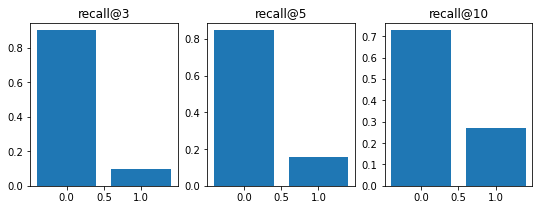

In [ ]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar((0,1), recall_at3.to_numpy())
plt.title('recall@3')
plt.subplot(132)
plt.bar((0,1), recall_at5.to_numpy())
plt.title('recall@5')

plt.subplot(133)
plt.bar((0,1), recall_at10.to_numpy())
plt.title('recall@10')

plt.show()

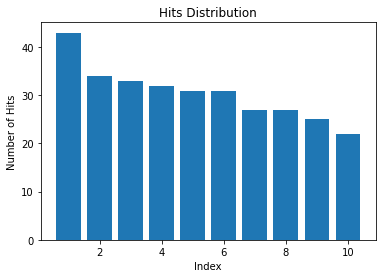

In [ ]:
ranks = pd.Series(ranks_idx).value_counts()

plt.bar( range(1,11), ranks)
plt.xlabel('Index')
plt.ylabel('Number of Hits')
plt.title('Hits Distribution')
plt.show()